<a href="https://colab.research.google.com/github/salvaderron/Artificial-Neural-Network_and_Deep-Learning/blob/main/ANN_%26_DL_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import time
drive.mount('/content/drive')

Mounted at /content/drive


100%|██████████| 170M/170M [00:04<00:00, 34.6MB/s]


Batch size: 4
Labels: ['truck', 'cat', 'automobile', 'automobile']


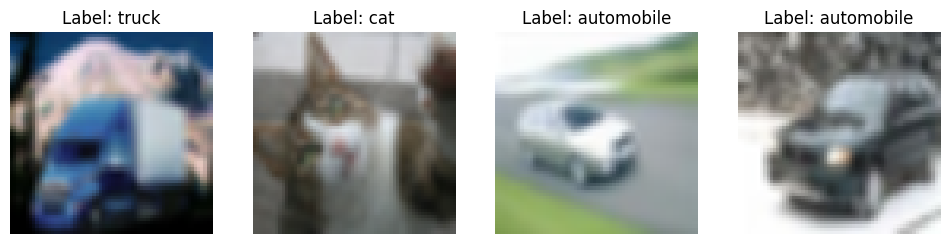

In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define transforms
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Load CIFAR-10 dataset
dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
loader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True)

# Function to show images
def show_images(images, labels, class_names):
    fig, axes = plt.subplots(1, len(images), figsize=(12, 4))
    for img, label, ax in zip(images, labels, axes):
        img = img.permute(1, 2, 0).numpy() * 0.5 + 0.5  # Denormalize
        ax.imshow(img)
        ax.set_title(f"Label: {class_names[label]}")
        ax.axis('off')
    plt.show()

# Test the loader
classes = dataset.classes
for images, labels in loader:
    print(f"Batch size: {len(images)}")
    print(f"Labels: {[classes[label] for label in labels]}")
    show_images(images, labels, classes)
    break
